age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64
   age     bmi  children      charges  sex_male  smoker_yes  region_northwest  \
0   19  27.900         0  16884.92400     False        True             False   
1   18  33.770         1   1725.55230      True       False             False   
2   28  33.000         3   4449.46200      True       False             False   
3   33  22.705         0  21984.47061      True       False              True   
4   32  28.880         0   3866.85520      True       False              True   

   region_southeast  region_southwest  bmi_smoker  
0             False              True        27.9  
1              True             False         0.0  
2              True             False         0.0  
3             False             False         0.0  
4             False             False         0.0  
Index(['age', 'bmi', 'children', 'charges', 'sex_male', 'smoker_yes',
       'region_north

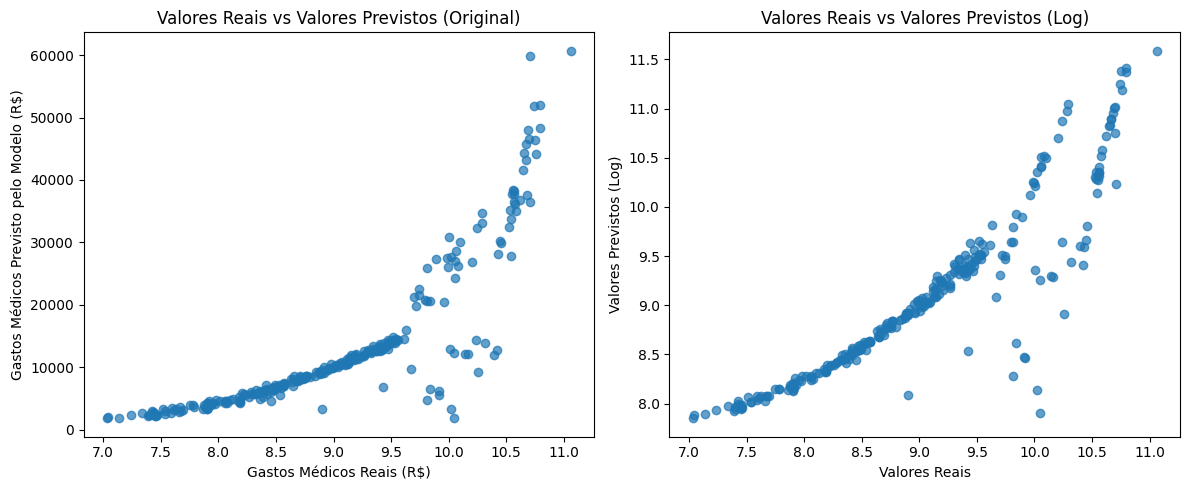

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np


data = pd.read_csv("insurance.csv")

# Verificando se há dados ausentes
print(data.isnull().sum())

# Codificando variáveis categóricas (gender, smoker e region)
data = pd.get_dummies(data, columns=["sex", "smoker", "region"], drop_first=True)

# Criando uma variável de interação entre bmi e smoker
data['bmi_smoker'] = data['bmi'] * data['smoker_yes']

# Exibindo as primeiras linhas
print(data.head())
print(data.columns)

# Definindo a variável dependente (y) e as variáveis independentes (X)
X = data.drop("charges", axis=1)
y = data["charges"]

# Dividindo os dados em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criando e treinando o modelo de Regressão Linear
model = LinearRegression()
model.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
y_pred = model.predict(X_test)

# Avaliando o modelo
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)

# Validação Cruzada para verificar a robustez do modelo
cv_scores = cross_val_score(model, X, y, cv=10, scoring='r2')
print("Cross-Validated R-squared (R2):", cv_scores.mean())

# Transformação logarítmica dos gastos para melhorar a normalidade e diminuir outliers
data['log_charges'] = np.log(data['charges'])
X = data.drop(["charges", "log_charges"], axis=1)
y = data["log_charges"]

# Dividindo novamente os dados após a transformação
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)
y_pred_log = model.predict(X_test)

# Avaliando o modelo após transformação logarítmica
mse_log = mean_squared_error(y_test, y_pred_log)
mae_log = mean_absolute_error(y_test, y_pred_log)
r2_log = r2_score(y_test, y_pred_log)

print("MSE após transformação logarítmica:", mse_log)
print("MAE após transformação logarítmica:", mae_log)
print("R2 após transformação logarítmica:", r2_log)

# Plotando os valores reais vs previsões para gastos originais e transformados
plt.figure(figsize=(12, 5))

# Gráfico para gastos originais
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Gastos Médicos Reais (R$)")
plt.ylabel("Gastos Médicos Previsto pelo Modelo (R$)")
plt.title("Valores Reais vs Valores Previstos (Original)")

# Gráfico para gastos transformados (Log)
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_log, alpha=0.7)
plt.xlabel("Valores Reais")
plt.ylabel("Valores Previstos (Log)")
plt.title("Valores Reais vs Valores Previstos (Log)")

plt.tight_layout()
plt.show()


# **Análise dos Dados de Gastos Médicos**

A presente análise busca entender os fatores que influenciam os gastos médicos dos clientes de um plano de saúde. Utilizando um conjunto de dados que contém informações sobre características dos clientes, como Índice de Massa Corporal (BMI), gênero, número de filhos, status de fumante e região, construímos um modelo de regressão linear para prever os gastos médicos.

### **Os principais resultados do modelo são:**

Mean Squared Error (MSE): 20.919.716,75
Mean Absolute Error (MAE): 2.756,90
R-squared (R²): 0,87, indicando que cerca de 87% da variação nos gastos pode ser explicada pelas variáveis independentes selecionadas.
Cross-Validated R-squared (R²): 0,84, reforçando a robustez do modelo.
Além disso, ao aplicar uma transformação logarítmica aos dados de gastos, observamos uma melhora na adequação do modelo, com um R² de 0,82, sugerindo que os gastos médicos seguem uma distribuição que pode ser melhor modelada em escala logarítmica.

### **Considerações Finais**
Esses resultados indicam que características como o IMC, o status de fumante e a região de residência têm um papel significativo na determinação dos gastos médicos. O modelo não só fornece previsões para gastos futuros, mas também serve como base para estratégias de precificação e segmentação de clientes.

A compreensão dessa relação pode auxiliar na personalização de produtos e na formulação de políticas de saúde mais eficazes, adaptadas às necessidades específicas de diferentes grupos de clientes.



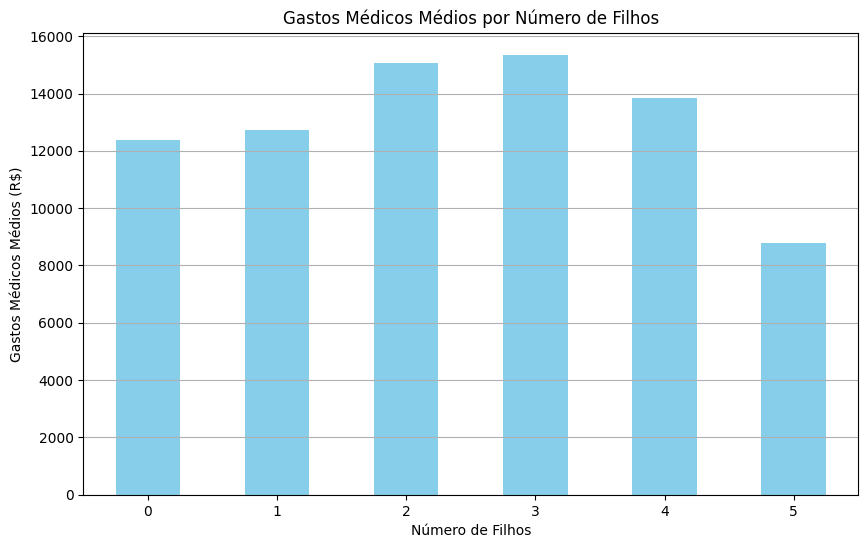

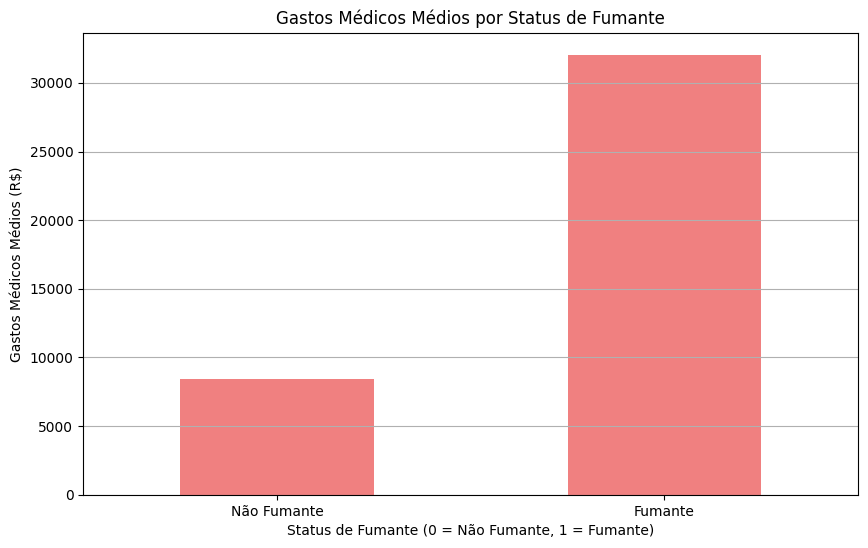

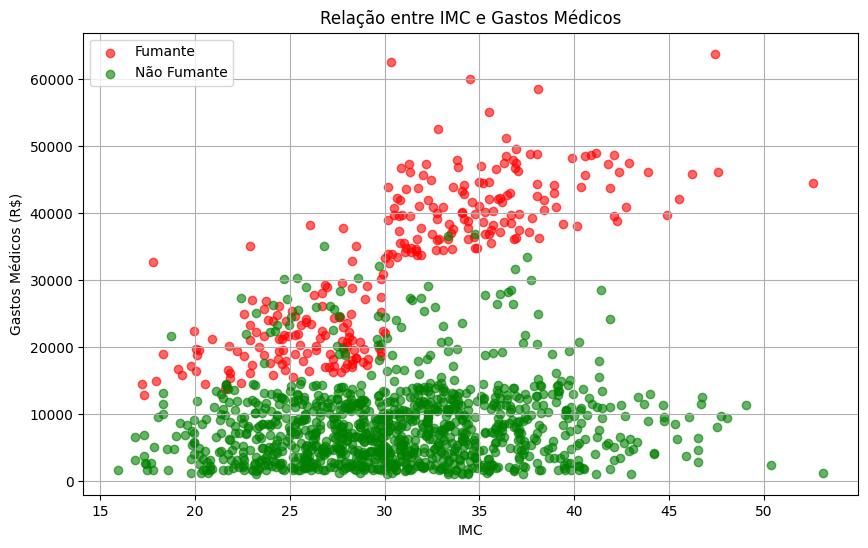

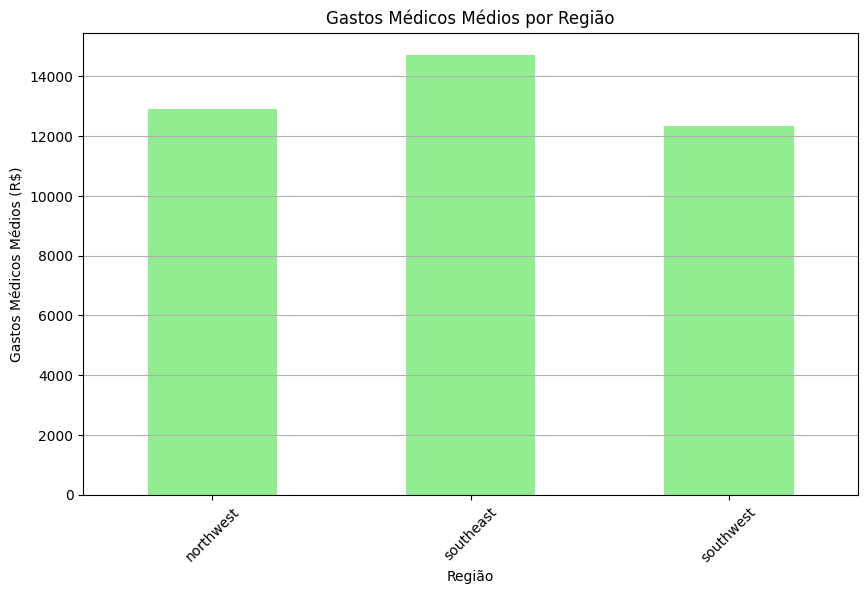

In [ ]:

# Gráfico de Gastos Médicos Médios por Número de Filhos
plt.figure(figsize=(10, 6))
data.groupby('children')['charges'].mean().plot(kind='bar', color='skyblue')
plt.title('Gastos Médicos Médios por Número de Filhos')
plt.xlabel('Número de Filhos')
plt.ylabel('Gastos Médicos Médios (R$)')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()



# Gráfico de Gastos Médicos Médios por Status de Fumante
plt.figure(figsize=(10, 6))
data.groupby('smoker_yes')['charges'].mean().plot(kind='bar', color='lightcoral')
plt.title('Gastos Médicos Médios por Status de Fumante')
plt.xlabel('Status de Fumante (0 = Não Fumante, 1 = Fumante)')
plt.ylabel('Gastos Médicos Médios (R$)')
plt.xticks(ticks=[0, 1], labels=['Não Fumante', 'Fumante'], rotation=0)
plt.grid(axis='y')
plt.show()


# Gráfico de Dispersão: IMC vs Gastos Médicos com Diferenciação por Fumante
plt.figure(figsize=(10, 6))
plt.scatter(data[data['smoker_yes'] == 1]['bmi'],
            data[data['smoker_yes'] == 1]['charges'],
            color='red', label='Fumante', alpha=0.6)
plt.scatter(data[data['smoker_yes'] == 0]['bmi'],
            data[data['smoker_yes'] == 0]['charges'],
            color='green', label='Não Fumante', alpha=0.6)
plt.title('Relação entre IMC e Gastos Médicos')
plt.xlabel('IMC')
plt.ylabel('Gastos Médicos (R$)')
plt.legend()
plt.grid()
plt.show()

# Gráfico de Gastos Médicos Médios por Região
region_columns = ['region_northwest', 'region_southeast', 'region_southwest']
data['region'] = data[region_columns].idxmax(axis=1).str.replace('region_', '')
plt.figure(figsize=(10, 6))
data.groupby('region')['charges'].mean().plot(kind='bar', color='lightgreen')
plt.title('Gastos Médicos Médios por Região')
plt.xlabel('Região')
plt.ylabel('Gastos Médicos Médios (R$)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


